# Efficient Frontier Part 2

In [1]:
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

In [2]:
ind = erk.get_ind_return()
er = erk.annualize_return(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

In [3]:
def portfolio_return(weights, returns):
    """
    weights -> returns
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    weights -> vol
    """
    return (weights.T @ covmat @ weights)**0.5

In [6]:
l = ["Food","Beer","Smoke","Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [10]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [8]:
weights = np.repeat(1/4,4)
erk.portfolio_return(weights,er[l])

0.19511097196038385

In [11]:
erk.portfolio_vol(weights,cov.loc[l,l])

0.055059195776437045

# 2 Asset Frontier

In [4]:
l = ["Games","Fin"]

In [16]:
n_points = 100
weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_points)]
weights

[array([0., 1.]),
 array([0.01010101, 0.98989899]),
 array([0.02020202, 0.97979798]),
 array([0.03030303, 0.96969697]),
 array([0.04040404, 0.95959596]),
 array([0.05050505, 0.94949495]),
 array([0.06060606, 0.93939394]),
 array([0.07070707, 0.92929293]),
 array([0.08080808, 0.91919192]),
 array([0.09090909, 0.90909091]),
 array([0.1010101, 0.8989899]),
 array([0.11111111, 0.88888889]),
 array([0.12121212, 0.87878788]),
 array([0.13131313, 0.86868687]),
 array([0.14141414, 0.85858586]),
 array([0.15151515, 0.84848485]),
 array([0.16161616, 0.83838384]),
 array([0.17171717, 0.82828283]),
 array([0.18181818, 0.81818182]),
 array([0.19191919, 0.80808081]),
 array([0.2020202, 0.7979798]),
 array([0.21212121, 0.78787879]),
 array([0.22222222, 0.77777778]),
 array([0.23232323, 0.76767677]),
 array([0.24242424, 0.75757576]),
 array([0.25252525, 0.74747475]),
 array([0.26262626, 0.73737374]),
 array([0.27272727, 0.72727273]),
 array([0.28282828, 0.71717172]),
 array([0.29292929, 0.70707071]),


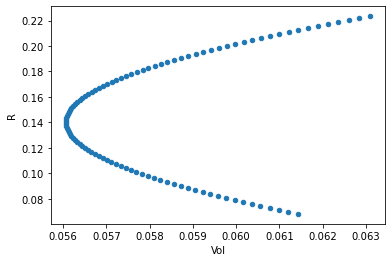

In [17]:
rets = [erk.portfolio_return(w,er[l]) for w in weights]
vols = [erk.portfolio_vol(w,cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R":rets,"Vol":vols})
ef.plot.scatter(x="Vol",y="R")

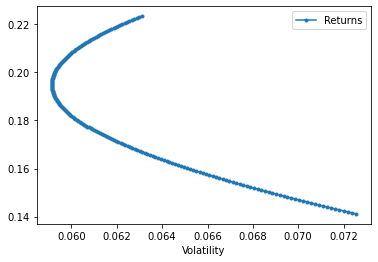

In [4]:
l = ["Fin","Beer"]
erk.plot_ef2(200,er[l],cov.loc[l,l])